# A. Feature Extraction and Classification<br>
In this section, you will focus on extracting meaningful features from a dataset of fruit images, which will lay the foundation for subsequent machine learning classification. Initially, you will extract the positions of fruits in the images, distinguishing them from the background to obtain clear information about their location and shape. This process is crucial as it directly influences the effectiveness of the machine learning models you will later apply. The goal is to understand how accurately and effectively different features can be extracted and how they impact the performance of various machine learning algorithms.

1. Extract the contours of fruits from the images in the fruit dataset. Fill in the contours with a mask to achieve separation of the foreground and background. Refer to the provided example image for guidance. (10 points)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

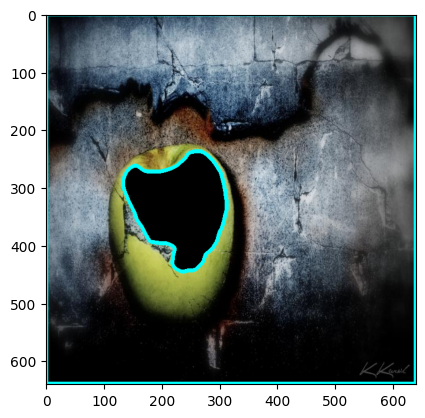

In [91]:

# Load the image
image_ori = cv2.imread('fruits_v2/test/Apple/3cf55d7ec520670b_jpg.rf.902884ab3f7ec23b529018c33b4414d2.jpg')
image = image_ori.copy()

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(gray, (31, 31), 0)


# Apply thresholding to obtain a binary image
kernel = np.ones((5, 5), np.uint8)

ret, thresh = cv2.threshold(img_blur, 180, 255, cv2.THRESH_BINARY_INV)
# thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)


# Find contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Filter out small contours
min_contour_area = 1000  # this is an arbitrary number; you might need to adjust it
large_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

# Create an empty mask
mask = np.zeros_like(gray)


# result = cv2.bitwise_and(image, mask)

# Draw contours on the mask
cv2.drawContours(mask, large_contours, -1, (255, 255, 0), cv2.FILLED)
mask_three_channel = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

result = cv2.bitwise_and(image, mask_three_channel)
cv2.drawContours(result, large_contours, -1, (255, 255, 0), 5)

# Apply the mask to the original image

# result = cv2.cvtColor(result, cv2.COLOR_GRAY2RGB)
# Display the result
result = result[:, :, ::-1]
plt.imshow(result)
plt.show()
